<center><h1>chen_jacqueline_hw2</h1></center>
<br>
<br>

Name: Jacqueline Chen
<br>
Github Username: jchen741
<br>
USC ID: 7983593463

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [267]:
import pandas as pd
import os
path =os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations


Get the Cycle Power Plant Data Set

In [268]:
filename = path + "/data/CCPP/Folds5x2_pp.xlsx"
word = "/notebook"

# Replace the word and update the filename variable
filename = filename.replace(word, "")

# Print the modified filename
df = pd.read_excel(filename, sheet_name='Sheet1')
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [269]:
# get the number of rows and columns
num_rows, num_columns = df.shape
print(f'number of rows in dataset is {num_rows} and number of columns in dataset is {num_columns}')

# display the first few rows to understand the data
print(df.head())
print(f'AT represents average temperature\nV represents exhaust vacuum\nAP represents ambient pressure\nRH represent relative humidity\nand PE represents energy output')
print(f'the first four columns are independent variables and the last column is the dependent variable')
print(f'each row represents a data point collected over six years')

number of rows in dataset is 9568 and number of columns in dataset is 5
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
AT represents average temperature
V represents exhaust vacuum
AP represents ambient pressure
RH represent relative humidity
and PE represents energy output
the first four columns are independent variables and the last column is the dependent variable
each row represents a data point collected over six years


#### ii. pairwise scatterplots of all the varianbles

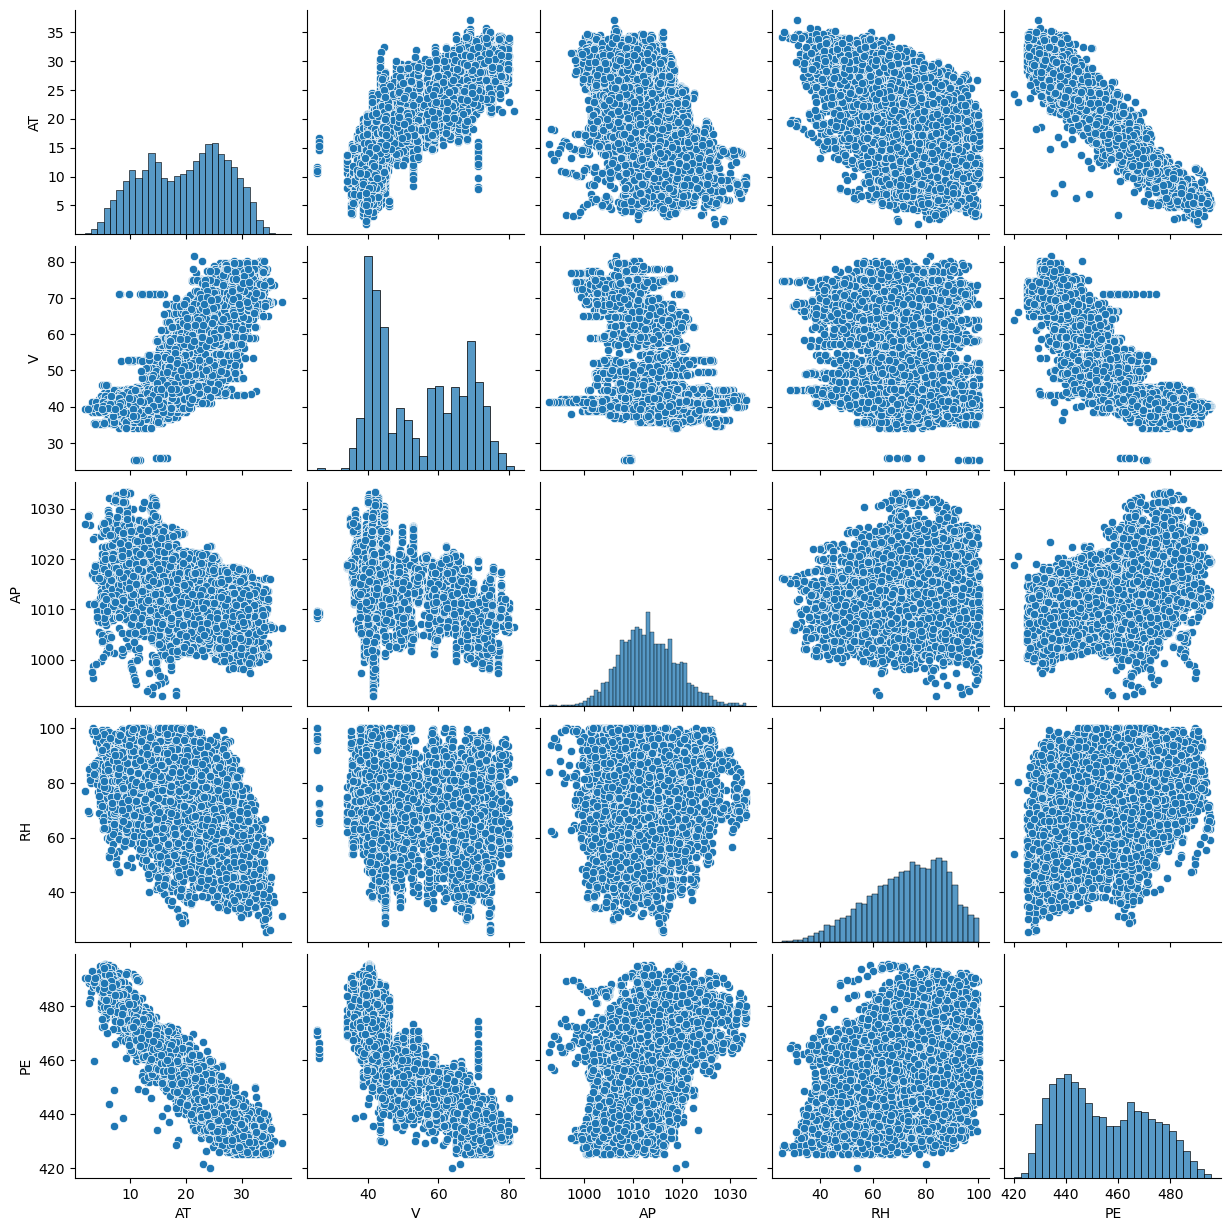

In [270]:
sns.pairplot(df)
plt.show()

Some of the relationships seem to have a linear relationship. For example, "V vs. AT", "PE vs AT", "AT vs. V", 
"PE vs. V", "AT vs. PE", "V vs. PE" all seem to hvae a stronger linear relationship that the other ones. 

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [271]:
summary_stats = df.describe()

# calculate IQRs for all the variables
IQRs = summary_stats.loc['75%'] - summary_stats.loc['25%']
summary_stats.loc['IQR'] = IQRs
print(summary_stats)

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000
IQR      12.210000    24.800000     8.160000    21.502500    28.680000


### (c) Simple Linear Regression

In [272]:
def get_cooks(cooks,x,y):
    outliers=dict()
    n=len(cooks)
    for i in range(0,n):
        if cooks[i]>=4/n:
            outliers[x[i]]=y[i]
    return outliers

(array([0.00000413, 0.00001112, 0.0000587 , ..., 0.0000018 , 0.00016707,
       0.00001878]), array([0.99999587, 0.99998888, 0.9999413 , ..., 0.9999982 , 0.99983295,
       0.99998122]))


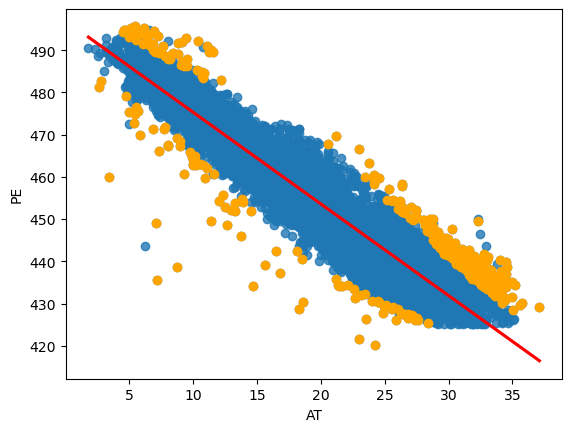

const    497.03412
AT        -2.17132
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:20:53   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

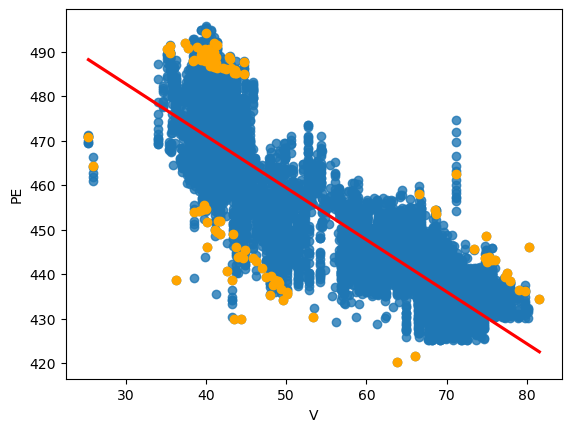

const    517.801526
V         -1.168135
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:20:54   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

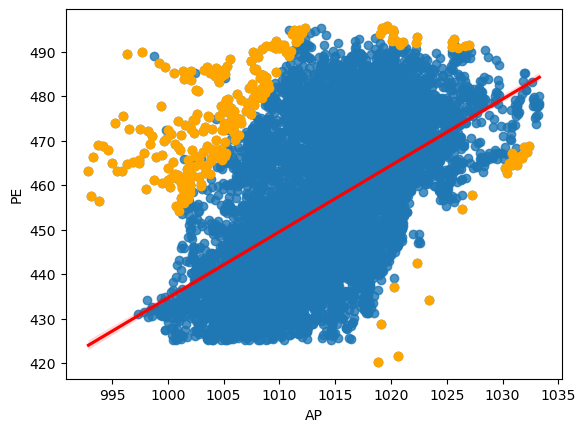

const   -1055.260989
AP          1.489872
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:20:55   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

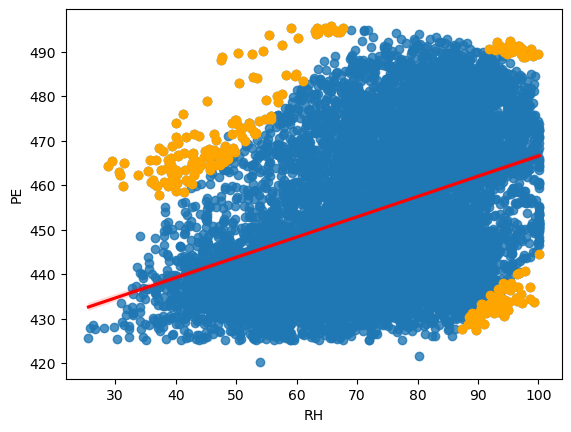

const    420.961766
RH         0.455650
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:20:56   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [273]:
coefficients = dict()
# iterate through all the independent variables
for column in df.columns[:-1]:
    # define a independent variable
    x = df[column]
    # define response variable
    y = df['PE']
    # add constant to predictor
    x = sm.add_constant(x)
    # fit linear regression model
    model = sm.OLS(y,x).fit()
    sns.regplot(x=column,y=df.columns[-1],data=df,line_kws={'color': 'red'})
    np.set_printoptions(suppress=True)
    #create instance of influence
    influence = model.get_influence()
    #obtain Cook's distance for each observation
    cooks = influence.cooks_distance
    #display Cook's distances
    print(cooks)
    cooks_points=get_cooks(cooks[0],df[column],df['PE'])
    dist = cooks[0]
    plt.scatter(cooks_points.keys(),cooks_points.values(),color='orange')
    plt.show()
    print(model.params)
    # for part 1 (e)

    coefficients[column]=[column,model.params[column]]

    print(model.summary())



Looking at the p-values of all the regression results, all the independent variables have statistical significance because the p-values are extremeley small. From the figures, we can confirm this is true because there is a clear trend between the predictor and the responses in every graph.

A general rule of thumb is that any observation with a Cook’s distance greater than 4/n (where n = total observations) is considered to be highly influential. (https://www.statology.org/cooks-distance-python/)
These outliers are in orange and the linear regresssion line is in red. These outliers can be removed for a better regression line.

### (d) Multiple Regression

In [274]:
# define a independent variable
x = df.columns[:-1]
# define response variable
y = df['PE']
# add constant to predictor
x = sm.add_constant(df[x])

multiple_model = sm.OLS(y,x).fit()
print(multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:20:56   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

From the results of the multiple regression model, all the p values are still extremely small, meaning they are all statistically significant and we can reject the null hypothesis because the predictor is likely to have a non-zero effect on the response variable.

### (e) 1c Compare to 1d

In [275]:
coefficients2 = dict()
col = df.columns[:-1]
# Store multivariate coefficients in coefficients2
for column in col:
    coefficients2[column] = [multiple_model.params[column]]
coefficientsDF = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Variable','Univariate Coefficients'])
coefficients2DF = pd.DataFrame.from_dict(coefficients2, orient='index', columns=['Multivariate Coefficients'])

combined_coefficients = pd.merge(coefficientsDF, coefficients2DF, left_index=True, right_index=True)
combined_coefficients


,Variable,Univariate Coefficients,Multivariate Coefficients
AT,AT,-2.171320,-1.977513
V,V,-1.168135,-0.233916
AP,AP,1.489872,0.062083
RH,RH,0.455650,-0.158054


<Axes: xlabel='Univariate Coefficients', ylabel='Multivariate Coefficients'>

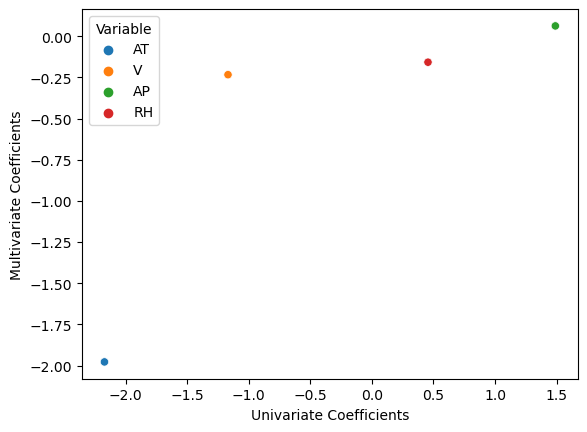

In [276]:
# scatterplot of univariate regression coefficients from 1c on the x-axis, and the
# multiple regression coefficients from 1d on the y-axis
sns.scatterplot(x='Univariate Coefficients',y='Multivariate Coefficients',data=combined_coefficients,hue='Variable')

The results from 1c show only the statistical significance between each individaul independent variable and the dependent variable. The results from 1d show that there is statistical significance between the combined independent variables that are all significant to the prediction as shown in the coefficient graph.

### (f) Nonlinear Association

for each predictor X. If the coefficients beta_2 and beta_3 are significantly different from zero, it suggests evidence of a nonlinear relationship.

In [277]:
nonlinear = []
col = df.columns[:-1]
# iterate through the predictors
for column in col:
    # create an instance of PolynomialFeatures
    poly = PolynomialFeatures(degree=3)  # can adjust the degree as needed
    # transform the predictor variable
    x_poly = poly.fit_transform(df[[column]])
    # define response variable
    y = df['PE']
    model_poly=sm.OLS(y,x_poly).fit()
    print(f"results for predictor {column}:")
    print(model_poly.summary().tables[1])
    

results for predictor AT:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
results for predictor V:


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
results for predictor AP:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
results for predictor RH:


### (g) Interactions of Predictors

In [278]:
poly_terms = PolynomialFeatures(2, interaction_only=True)
x_poly = poly_terms.fit_transform(df[col])
columns=poly_terms.get_feature_names_out(col)
x_poly_all = pd.DataFrame(x_poly, columns=columns)
# define response variable
y = df['PE']
model_allpoly = sm.OLS(y, x_poly_all).fit()
model_allpoly.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
1,685.7825,78.640,8.721,0.000,531.631,839.934
AT,-4.3470,2.373,-1.832,0.067,-8.999,0.305
V,-7.6749,1.351,-5.682,0.000,-10.323,-5.027
AP,-0.1524,0.077,-1.983,0.047,-0.303,-0.002
RH,1.5709,0.773,2.031,0.042,0.055,3.087
AT V,0.0210,0.001,23.338,0.000,0.019,0.023
AT AP,0.0018,0.002,0.752,0.452,-0.003,0.006
AT RH,-0.0052,0.001,-6.444,0.000,-0.007,-0.004
V AP,0.0068,0.001,5.135,0.000,0.004,0.009
V RH,0.0008,0.000,1.716,0.086,-0.000,0.002


### (h) Improvement

In [279]:
# separating test and training set using train_test_split from sckitlearn
x_train, x_test, y_train, y_test = train_test_split(x_poly_all, y, test_size=0.3)
cols = ['1'] + df.columns[:-1].tolist()
print(cols)
# regression model on a randomly selected 70% subset of the data with all predictors
model_pred = sm.OLS(y_train, x_train[cols]).fit()
y_pred = model_pred.predict(x_test[cols])
print('test MSE = ',mean_squared_error(y_test,y_pred))
print('train MSE = ',mean_squared_error(y_train,model_pred.predict(x_train[cols])))
model_pred.summary().tables[1]

['1', 'AT', 'V', 'AP', 'RH']
test MSE =  20.87310090000947
train MSE =  20.73503809313465


,coef,std err,t,P>|t|,[0.025,0.975]
1,458.5063,11.439,40.082,0.000,436.082,480.931
AT,-1.9581,0.018,-107.502,0.000,-1.994,-1.922
V,-0.2474,0.009,-28.270,0.000,-0.265,-0.230
AP,0.0583,0.011,5.255,0.000,0.037,0.080
RH,-0.1543,0.005,-31.045,0.000,-0.164,-0.145


In [280]:
# getting all possible terms and interactions
poly_terms = PolynomialFeatures(2, interaction_only=False)
x_all = poly_terms.fit_transform(df[col])
columns=poly_terms.get_feature_names_out(col)
x_all = pd.DataFrame(x_all, columns=columns)
# new training and test sets with all possible terms and interactions
x_train, x_test, y_train, y_test = train_test_split(x_all, df['PE'], test_size=0.3)

model_all = sm.OLS(y_train, x_train).fit()
y_pred = model_all.predict(x_test)
print('test MSE = ',mean_squared_error(y_test,y_pred))
print('train MSE = ',mean_squared_error(y_train,model_all.predict(x_train)))
model_all.summary().tables[1]

test MSE =  17.91067861101233
train MSE =  18.215935647944573


,coef,std err,t,P>|t|,[0.025,0.975]
1,-6371.2437,1459.498,-4.365,0.000,-9232.326,-3510.161
AT,-10.5393,3.768,-2.797,0.005,-17.926,-3.152
V,-1.2086,1.803,-0.670,0.503,-4.744,2.327
AP,13.4548,2.830,4.754,0.000,7.907,19.003
RH,2.8839,1.067,2.702,0.007,0.792,4.976
AT^2,0.0197,0.004,5.202,0.000,0.012,0.027
AT V,0.0084,0.003,2.524,0.012,0.002,0.015
AT AP,0.0078,0.004,2.122,0.034,0.001,0.015
AT RH,-0.0046,0.002,-2.482,0.013,-0.008,-0.001
V^2,0.0004,0.001,0.442,0.658,-0.001,0.002


Looking at the p values there are some terms that are insignificant, so we can improve our model by removing them if their p value is less than 0.05


In [281]:
# removing terms that are insignificant
p_min = 0.05
insignificant_vars = model_all.pvalues[model_all.pvalues > p_min].index.tolist()
print(insignificant_vars)
x_train = x_train.drop(insignificant_vars, axis = 1)
x_test = x_test.drop(insignificant_vars, axis = 1)

model_sig = sm.OLS(y_train, x_train).fit()
y_pred=model_sig.predict(x_test)
print('test MSE=',mean_squared_error(y_test,y_pred))
print('train MSE=',mean_squared_error(y_train,model_sig.predict(x_train)))
model_sig.summary().tables[1]

['V', 'V^2', 'V AP', 'V RH']
test MSE= 18.259758664668308
train MSE= 18.84283035979516


,coef,std err,t,P>|t|,[0.025,0.975]
1,-6011.9533,1469.251,-4.092,0.000,-8892.154,-3131.752
AT,-9.3763,2.389,-3.925,0.000,-14.059,-4.693
AP,12.6095,2.847,4.430,0.000,7.029,18.190
RH,3.7188,1.015,3.663,0.000,1.729,5.709
AT^2,0.0425,0.002,22.266,0.000,0.039,0.046
AT V,-0.0122,0.000,-30.112,0.000,-0.013,-0.011
AT AP,0.0068,0.002,2.954,0.003,0.002,0.011
AT RH,-0.0049,0.001,-4.815,0.000,-0.007,-0.003
AP^2,-0.0061,0.001,-4.423,0.000,-0.009,-0.003
AP RH,-0.0034,0.001,-3.447,0.001,-0.005,-0.001


### (i) KNN

In [282]:
def kNN(x_train, y_train, x_test, y_test, title):
    train_error = []
    test_error  = []
    optimal_k = None
    min_error = float('inf')
    
    for k in range(1, 101, 1):
        # train k nearest neighbor regression model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(x_train, y_train)
        
        # calculate mse for test set
        y_pred_test = knn.predict(x_test)
        test_err = mean_squared_error(y_test, y_pred_test)
        test_error.append(test_err)
        
        y_pred_train = knn.predict(x_train)
        train_err = mean_squared_error(y_train, y_pred_train)
        train_error.append(train_err)
        
        if test_err < min_error:
            min_error = test_err
            optimal_k = k
    # print(test_error)
    print(f'best test error at {optimal_k} is {min_error}')

    plt.plot([1/k for k in range(1, 101)], train_error, label='Train Error')
    plt.plot([1/k for k in range(1, 101)], test_error, label='Test Error')
        
    plt.title(title)
    plt.xlabel('1/k')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()


best test error at 5 is 15.541138231974923


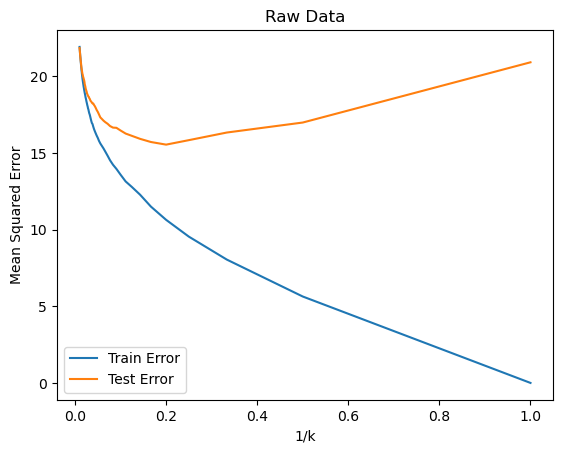

In [283]:
x_train, x_test, y_train, y_test = train_test_split(x_poly_all, y, test_size=0.3)
kNN(x_train[col], y_train, x_test[col], y_test,'Raw Data')

best test error at 5 is 14.649905896203418


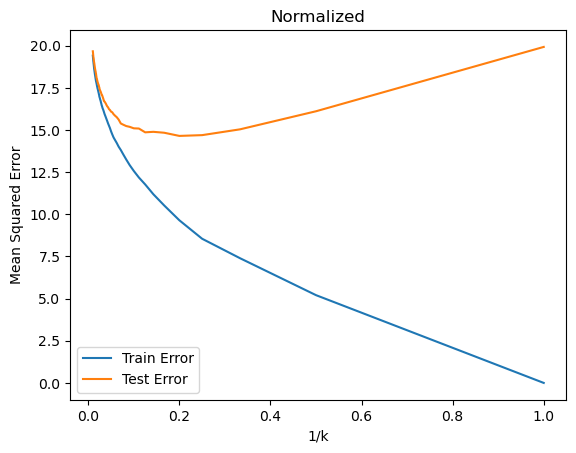

In [284]:
# normalized version
scaler =  StandardScaler()
x_normalized_train = scaler.fit_transform(x_train[col])
x_normalized_test = scaler.transform(x_test[col])
kNN(x_normalized_train,y_train,x_normalized_test,y_test,'Normalized')

### (j ) Compare KNN and Linear

The best k value is around 4-5 in the normalized dataset and flucuates because of the random split of the data. From the KNN regression and linear regression, we see that the test MSE for KNN regression is lower than the linear regression models. This can happen because k-Nearest Neighbors regression is a non-parametric method that can capture complex relationships in the data, whereas linear regression assumes a linear relationship between the predictors and the target variable.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

For this case, a flexible method is expected to perform better than an inflexible method beacuse with a large sample size, a flexible model has the ability to show underlying patterns and relationships. The risk of overfitting is reduced when there is a large amount of data to train and learn from. Inflexible methods can lead to higher bias.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Using a flexible method can easily overfit the data since there are a small number of observations. So, an inflexible statistical learning method is preferred to help generalize the data better and have simpler models.

### (c) The relationship between the predictors and response is highly non-linear.

A flexible method is better so the data can adapt better to non-linear patterns and provide a better fit than inflexible meethods like linear regression.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

If the variance is high, that means that there is a lot of nooise in the data. Inflexible method would be better to prevent overfitting. Flexible methods will try to fit the noise, but in this case, simpler is better, so inflexible methods are preferred.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

The formula for euclidean distance is:
<br>
d = sqr((x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2)
<br>
For each observation:
<br>
1. d_1 = sqr((0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2) = 3
<br>
2. d_2 = sqr((2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2) = 2
<br>
3. d_3 = sqr((0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2) = sqr(10) = 3.162
<br>
4. d_4 = sqr((0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2) = sqr(5) = 2.23
<br>
5. d_5 = sqr((-1 - 0)^2 + (0 - 0)^2 + (1 - 0)^2) = sqr(2) = 1.41
<br>
6. d_6 = sqr((1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2) = sqr(3) = 1.73


### (b) What is our prediction with K = 1? Why?

To predict with k = 1, we select the distance with the smallest Euclidean distance to the test point, which is observation 5 which gives Green.

### (c) What is our prediction with K = 3? Why?

To predict with k = 3, we select 3 observations that are closest, which are observations 5,6,and 2. Since most of the observations output Red, the final prediction would be Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

The best k values would be small to prevent overfitting and allows the model to produce a more generalized description of the patterns in the data.